In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
seed1_name = 'Tori_Seed_Unpolish_Infected_Tobamo_S2_Vnir__T11_2022-08-28_11-20-20_seed_200.npy'
seed2_name = 'Tori_Seed_Unpolish_Infected_Tobamo_S2_Vnir__T12_2022-08-28_11-23-17_seed_200.npy'

seed1 = np.load(seed1_name).squeeze()
seed2 = np.load(seed2_name).squeeze()

print(seed1.shape)
print(seed2.shape)

(130, 107)
(123, 104)


In [4]:
def display_seed(seed):
    plt.imshow(seed, cmap='gray')
    plt.title(f'seed')
    plt.colorbar()
    plt.show()

42
2769.5
34 101 11 74


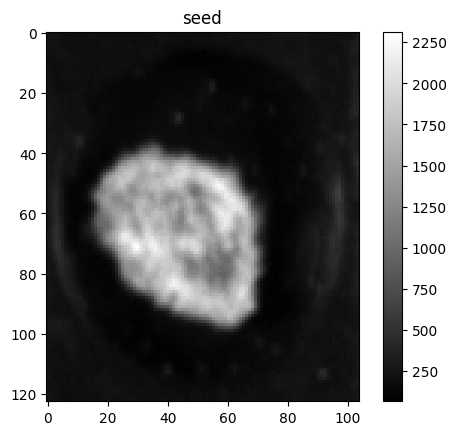

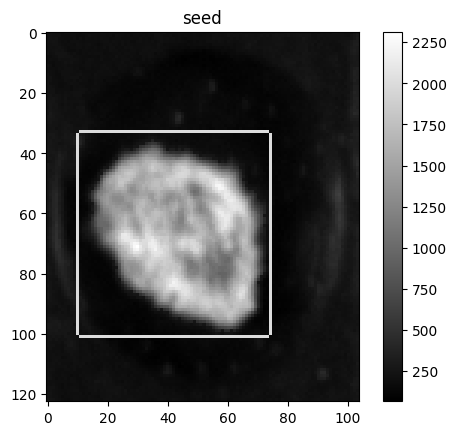

In [77]:
normalized_image = cv2.normalize(seed2, None, 0, 255, cv2.NORM_MINMAX)
image_uint8 = normalized_image.astype(np.uint8)

# Threshold the image to get a binary image
threshold = 320
_, binary_image = cv2.threshold(image_uint8, int(threshold * 255 / 4096), 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
seed_contour = max(contours, key=cv2.contourArea)
print(cv2.contourArea(seed_contour))

contoured_seed = seed2.copy()

rightmost_point = max(seed_contour, key=lambda point: point[0][0])  # Max x-coordinate
leftmost_point = min(seed_contour, key=lambda point: point[0][0])  # Min x-coordinate
uppermost_point = min(seed_contour, key=lambda point: point[0][1])  # Min y-coordinate
downmost_point = max(seed_contour, key=lambda point: point[0][1])  # Max y-coordinate
y_uppermost, x_leftmost = uppermost_point[0][1] - 1, leftmost_point[0][0] - 1
y_downmost, x_rightmost = downmost_point[0][1] + 1, rightmost_point[0][0] +1
print(y_uppermost,y_downmost,x_leftmost,x_rightmost)
line_thickness = 1
contoured_seed[y_uppermost-line_thickness:y_uppermost, x_leftmost:x_rightmost] = 2000
contoured_seed[y_downmost:y_downmost+line_thickness, x_leftmost:x_rightmost] = 2000
contoured_seed[y_uppermost:y_downmost, x_leftmost-line_thickness:x_leftmost] = 2000
contoured_seed[y_uppermost:y_downmost, x_rightmost:x_rightmost+line_thickness] = 2000

# Draw contours on the original image (or a copy of it)
cv2.drawContours(contoured_seed, seed_contour, -1, (255), 1)

display_seed(seed2)
display_seed(contoured_seed)

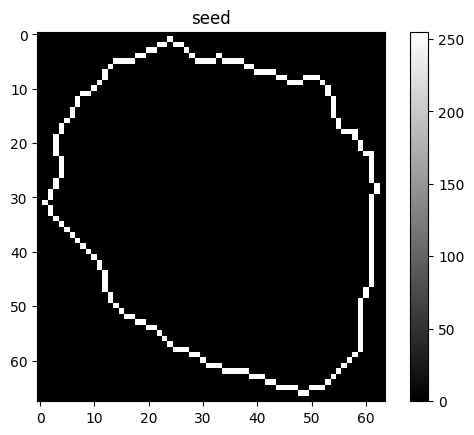

In [83]:
height = y_downmost - y_uppermost + 1
width = x_rightmost - x_leftmost + 1
black_image = np.zeros((height, width), dtype=np.uint8)

# Draw the largest contour in white on the black image
# Adjust the contour to fit inside the bounding box
contour_offset = np.array([[-x_leftmost, -y_uppermost]])  # Offset the contour to fit within the new image
adjusted_contour = seed_contour + contour_offset

# Draw the contour in white
cv2.drawContours(black_image, [adjusted_contour], -1, (255), thickness=1)

display_seed(black_image)